In [1]:
import serial

In [2]:
esp32 = serial.Serial('/dev/ttyS5', baudrate=115200, timeout=20)

In [22]:
esp32.read(2)

b'yo'

In [4]:
b'\x0e\x02\x0e\x0e\x06\x02\x0e\x0e\x02\x0e\x0e\x02\x06\x06\x06\x06\x06/3\x00\x00\xdas\xda@\x00_\x00\x00\xf8p\xfe\xfb\xf8\xcf\xdf\x00\x00\x03\x07\x0e\x0f\x08\x03\x07\x03\x03\r\x07\x03\r\x03\x08\x03\x07\r\x07\x03\x07\xdf\x07\xae\x03\x02\x06\x06\x02\x04\x04\x04\x0c\x0c\x0c[\x18\x00/\x1f\x00\x01\xe6\xe7U\x00\x00\x00\x10\x00\x00 \x00\x02\xbe\xff\xdf\x11\x00\x00\x00\x00\x00\x00\x00\x01\x00\x13\x00\x00\x00\x7f\xfd\xddq\xb9\xd2\xf6\xfc\xff\xde\xea\x01\x01\xd7\x01\x00\x02\x10\x00\x80\x01\x02\x800\x00\x04\x00\x00\x08\x00\x00\x00\x00D\xf0\xa8y\x08@\x00\x000\x00\x00\x00\x00\x8d\x08\x07\x00\x00\x82\x00\x00\x10\x00\x00\x00\t\x05\x00\x00\x00\x00\x00\x1c}\xf9\x7f\xf6\xff\x9a\x00\x00\xc0\xfe\x01\x00\x00\x00 _\xfb\xec\x86\xf3[\xed\xf9\xff\xbd\xfe\xed\xef\xd8w\xff\xfdS\xff\xb4\x99\x1b_\x1d_\xd3\xbf\xfe\xee\xf5\xfd\xbe\x86\xf7N\xe0\xea\x89M\xff\xff\xf5\x80\n'.decode('utf8')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xda in position 21: invalid continuation byte

receiving


<ipython-input-67-0f53125d2e71>:21: MatplotlibDeprecationWarning: 
The on_mappable_changed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use update_normal instead.
  cbar.on_mappable_changed(therm1) # update colorbar range


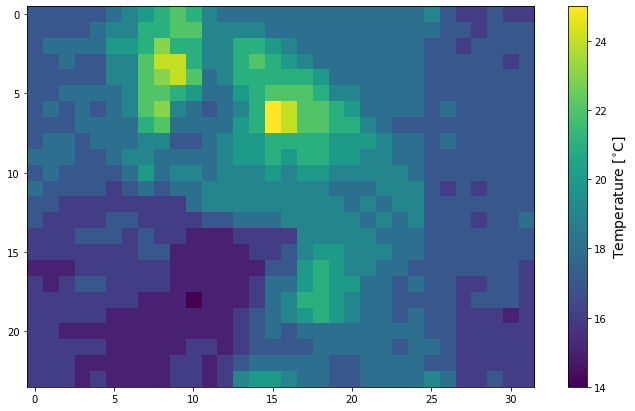

saving


In [67]:
import numpy as np
import matplotlib.pyplot as plt
import time

mlx_shape = (24,32)

# setup the figure for plotting
plt.ion() # enables interactive plotting
fig,ax = plt.subplots(figsize=(12,7))
therm1 = ax.imshow(np.zeros(mlx_shape),vmin=0,vmax=60) #start plot with zeros
cbar = fig.colorbar(therm1) # setup colorbar for temps
cbar.set_label('Temperature [$^{\circ}$C]',fontsize=14) # colorbar label
frame = np.zeros((24*32,)) # setup array for storing all 768 temperatures
t_array = []
print('receiving')
data = [int(i) for i in esp32.read(768)]
t1 = time.monotonic()
data_array = (np.reshape(data, mlx_shape)) # reshape to 24x32
therm1.set_data(np.fliplr(data_array)) # flip left to right
therm1.set_clim(vmin=np.min(data_array),vmax=np.max(data_array)) # set bounds
cbar.on_mappable_changed(therm1) # update colorbar range
plt.pause(0.001) # required
print('saving')
fig.savefig(f'mlx90640_test_fliplr.png',dpi=300,facecolor='#FCFCFC', bbox_inches='tight') # comment out to speed up
t_array.append(time.monotonic()-t1)